> ### ``` It’s Not What You Say, But How You Say It```

### Emotion classification using the RAVDESS dataset

You can find detail description about dataset above. Description was provided by Zenodo. Dataset can be downloaded from [here &#8618; .](https://zenodo.org/record/1188976#.Xpaa3i-caAP)

I used audio only dataset and created a model for prediction of emotion audio.

According to dataset, there are 2 sentences for audio, and they are "Kids are talkin by the door" and "Dogs are sitting by the door".
My main purpose on this project is analyze audio files and find the emotion from them. 


##### Description from original page:


The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS) contains 7356 files (total size: 24.8 GB). The database contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech includes calm, happy, sad, angry, fearful, surprise, and disgust expressions, and song contains calm, happy, sad, angry, and fearful emotions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression. All conditions are available in three modality formats: Audio-only (16bit, 48kHz .wav), Audio-Video (720p H.264, AAC 48kHz, .mp4), and Video-only (no sound).  Note, there are no song files for Actor_18.

#### File naming convention

Each of the 7356 RAVDESS files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 02-01-06-01-02-01-12.mp4). These identifiers define the stimulus characteristics: 

**Filename identifiers**

* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
* Vocal channel (01 = speech, 02 = song).
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

Filename example: 02-01-06-01-02-01-12.mp4 

- Video-only (02)
- Speech (01)
- Fearful (06)
- Normal intensity (01)
- Statement "dogs" (02)
- 1st Repetition (01)
- 12th Actor (12)
- Female, as the actor ID number is even.


#### What is Audio & Speech Processing

* Audio signal processing is a subfield of signal processing that is concerned with the electronic manipulation of audio signals. Audio signals are electronic representations of sound waves—longitudinal waves which travel through air, consisting of compressions and rarefactions. The energy contained in audio signals is typically measured in decibels. As audio signals may be represented in either digital or analog format, processing may occur in either domain. Analog processors operate directly on the electrical signal, while digital processors operate mathematically on its digital representation. [[1]](https://en.wikipedia.org/wiki/Audio_signal_processing)

* Speech processing is the study of speech signals and the processing methods of signals. The signals are usually processed in a digital representation, so speech processing can be regarded as a special case of digital signal processing, applied to speech signals. Aspects of speech processing includes the acquisition, manipulation, storage, transfer and output of speech signals. The input is called speech recognition and the output is called speech synthesis. [[2]](https://en.wikipedia.org/wiki/Speech_processing)

#### Human Voice

* The human voice consists of sound made by a human being using the vocal tract, such as talking, singing, laughing, crying, screaming, shouting, yelling etc. The human voice frequency is specifically a part of human sound production in which the vocal folds (vocal cords) are the primary sound source. (Other sound production mechanisms produced from the same general area of the body involve the production of unvoiced consonants, clicks, whistling and whispering.)[[3]](https://en.wikipedia.org/wiki/Human_voice)

* A labeled anatomical diagram of the vocal folds or cords.
<img src="https://upload.wikimedia.org/wikipedia/commons/b/bd/Gray1204.png" width="400" height="400" />

* Men and womens have different sizes of vocal folds. These difference causes diferent pitch or loud levels. 
* All voices have different frequencies. A voice frequency (VF) or voice band is one of the frequencies, within part of the audio range, that is being used for the transmission of speech. [[4]](https://en.wikipedia.org/wiki/Voice_frequency) 
* The ability to modulate vocal sounds and generate speech is one of the features which set humans apart from other living beings. The human voice can be characterized by several attributes such as pitch, timbre, loudness, and vocal tone. It has often been observed that humans express their emotions by varying different vocal attributes during speech generation. Hence, deduction of human emotions through voice and speech analysis has a practical plausibility and could potentially be beneficial for improving human conversational and persuasion skills.[[5]](https://arxiv.org/pdf/1710.10198.pdf)

* Below there are 2 tables to show two different emotional state statistics. First one is normal emotional state and second one is angry emotional state [[5]](https://arxiv.org/pdf/1710.10198.pdf). The most apparent information in tables is when you are angry state voice is louder than normal state. And second apparent one is when you are angry time gaps between words is smaller than normal state. 

<b><center>Normal Emotional State</center></b>

|                 | Pitch (Hz) | SPL(dB)     | Timbre ascend time (s) | Timbre descend time (s) | Time gaps between words (s) |
|-----------------|------------|-------------|------------------------|-------------------------|-----------------------------|
| Speech Sample 1 | 1248 Hz    | Gain -50 dB | 0.12 s                 | 0.11 s                  | 0.12 s                      |
| Speech Sample 2 | 1355 Hz    | Gain -48 dB | 0.06 s                 | 0.05 s                  | 0.12 s                      |

<b><center>Angry Emotional State</center></b>

|                 | Pitch (Hz) | SPL(dB)     | Timbre ascend time (s) | Timbre descend time (s) | Time gaps between words (s) |
|-----------------|------------|-------------|------------------------|-------------------------|-----------------------------|
| Speech Sample 1 | 1541 Hz    | Gain -30 dB | 0.13 s                 | 0.10 s                  | 0.09 s                      |
| Speech Sample 2 | 1652 Hz    | Gain -29 dB | 0.06 s                 | 0.04 s                  | 0.10 s                      |

**Emotional state of a human is able to understandable for all humans. Because we know how to process coming voice. In this notebook I will try the understand emotional state of humans.**

In [32]:
import os
from os.path import isdir, join
import random
import time
import datetime
import IPython.display as ipd
from pathlib import Path
from tqdm import tqdm
import pickle

# data analysis
import numpy as np
import pandas as pd


# Math
import numpy as np
from scipy.optimize import minimize
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa
from librosa import display
import soundfile

# preprocessing & modelling
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
# import lightgbm as lgb
from lightgbm import LGBMClassifier
import tensorflow as tf
from tensorflow.keras import backend as K

# visualization
import matplotlib.pyplot as plt
from matplotlib import colors
import bokeh
import seaborn as sns

# helpers
from helpers import util, modeling, definitions as d
from importlib import reload
reload(util)
reload(d)
reload(modeling)

%matplotlib inline 

# np.random.seed(1019)
# tf.random.set_seed(1019)

In [2]:
seed = 1019
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

### Explotary Data Analysis

---

I have 2452 different voice file with different properties.


In [3]:
data_files = d.get_data_files()

data_files.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   full_path            2452 non-null   object
 1   parent_path          2452 non-null   object
 2   file_name            2452 non-null   object
 3   actor_num            2452 non-null   object
 4   modelity             2452 non-null   object
 5   vocal_channel        2452 non-null   object
 6   emotion              2452 non-null   object
 7   emotional_intensity  2452 non-null   object
 8   statement            2452 non-null   object
 9   repetition           2452 non-null   object
 10  actor_gender         2452 non-null   object
dtypes: object(11)
memory usage: 210.8+ KB


---

I choose different gender and different emotions with same statement. 

Waveplots are good representing for voice. You can understand which part of voice is strong or aloud when you listening, and you can see the silent parts of voice file. But waveplots doesn't show any clue for gender. 

I choosed 4 file from files with happy and angry voices with song.

In [4]:
#select first file for filter. 
male_happy = data_files.query(" actor_gender=='male' & emotion=='happy' & statement=='Dogs are sitting by the door' & vocal_channel=='song'")['full_path'].iloc[13]
female_happy = data_files.query(" actor_gender=='female' & emotion=='happy' & statement=='Dogs are sitting by the door' & vocal_channel=='song'")['full_path'].iloc[0]

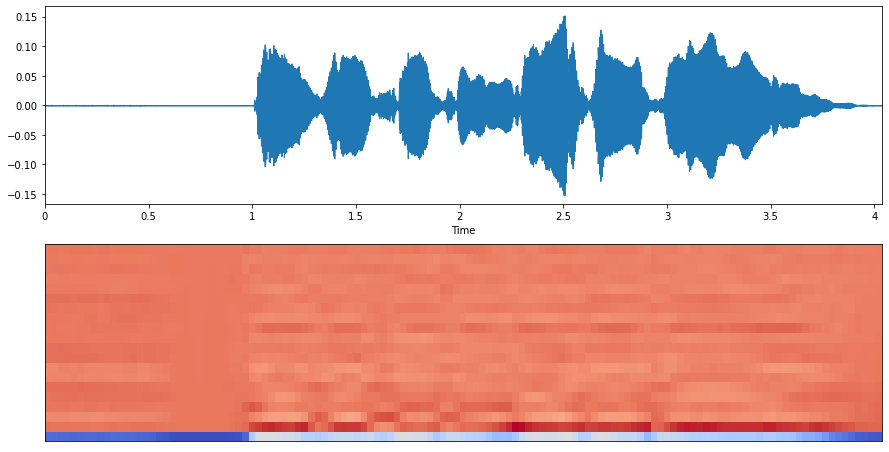

In [5]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))

male_file, sample_rate = librosa.load(male_happy, sr=16000)
male_mfcc = librosa.feature.mfcc(y=male_file, sr=sample_rate)
librosa.display.waveplot(male_file, sr=sample_rate, ax=axes[0])
librosa.display.specshow(male_mfcc, sr=sample_rate, ax=axes[1])

ipd.Audio(male_happy)

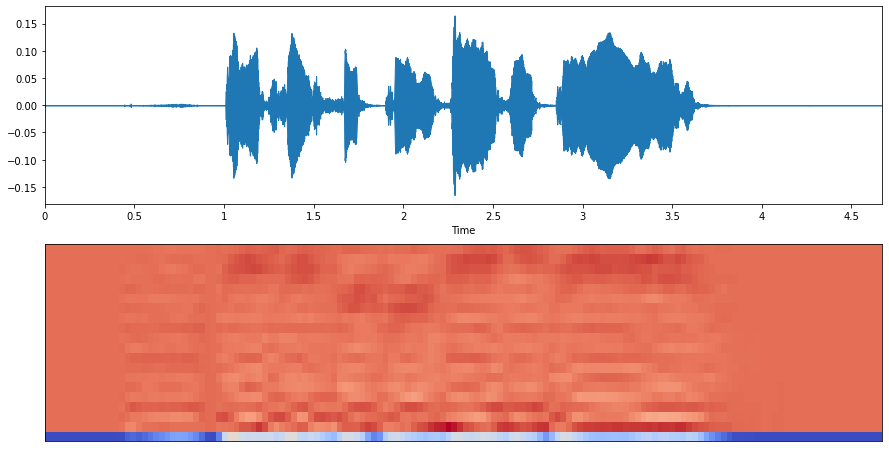

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))

female_file, sample_rate = librosa.load(female_happy, sr=16000)
female_mfcc = librosa.feature.mfcc(y=female_file, sr=sample_rate)
librosa.display.waveplot(female_file, sr=sample_rate, ax=axes[0])
librosa.display.specshow(female_mfcc, sr=sample_rate, ax=axes[1])

ipd.Audio(female_happy)

In [7]:
#select first file for filter. 
male_angry = data_files.query(" actor_gender=='male' & emotion=='angry' & statement=='Dogs are sitting by the door' & vocal_channel=='song'")['full_path'].iloc[13]
female_angry = data_files.query(" actor_gender=='female' & emotion=='angry' & statement=='Dogs are sitting by the door' & vocal_channel=='song'")['full_path'].iloc[13]

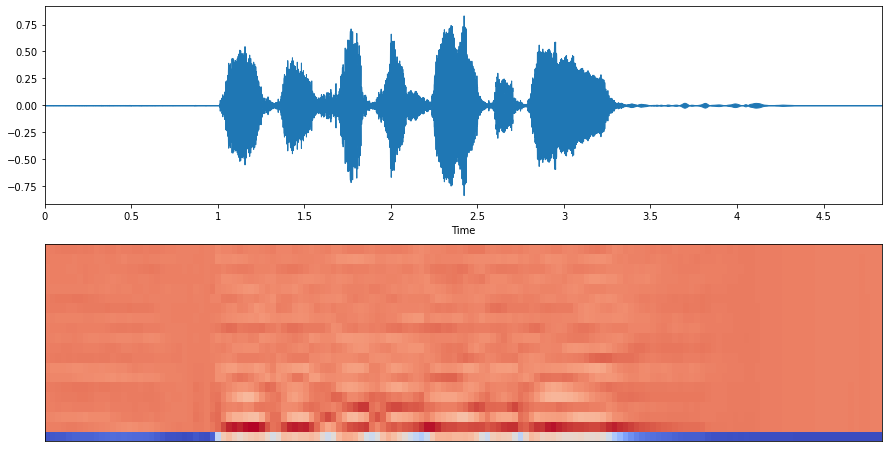

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))

male_file, sample_rate = librosa.load(male_angry, sr=16000)
male_mfcc = librosa.feature.mfcc(y=male_file, sr=sample_rate)
librosa.display.waveplot(male_file, sr=sample_rate, ax=axes[0])
librosa.display.specshow(male_mfcc, sr=sample_rate, ax=axes[1])

ipd.Audio(male_angry)

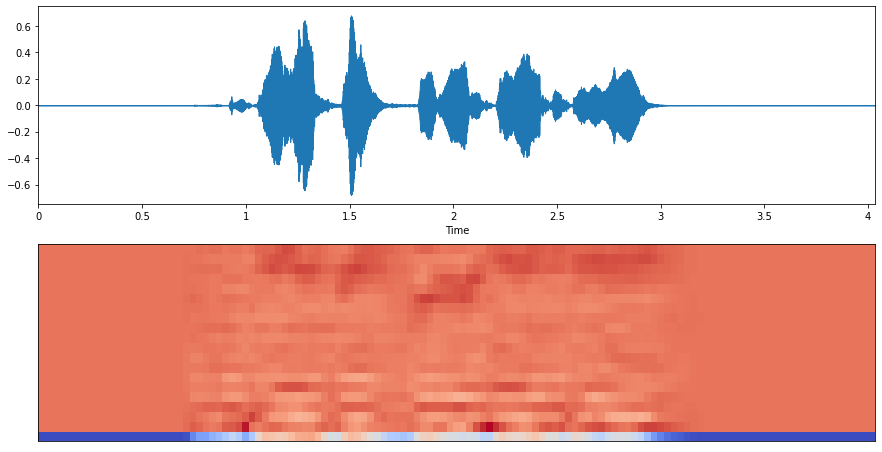

In [9]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))

female_file, sample_rate = librosa.load(female_angry, sr=16000)
female_mfcc = librosa.feature.mfcc(y=female_file, sr=sample_rate)
librosa.display.waveplot(female_file, sr=sample_rate, ax=axes[0])
librosa.display.specshow(female_mfcc, sr=sample_rate, ax=axes[1])

ipd.Audio(female_angry)

---

I put two graphs for voices, waveplot and MSCC spectogram. First think I saw from graphs is there is no difference from graphs for gender or emotion information. So, I searched for new representation or transformation different from MFCC, and I found Chroma and mel power.

Let's look at them all together. 

/Users/tuncayk/genel/jupyter/notebooks/practical/speech_emotion/helpers/util.py:70: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, samples = wavfile.read(f)


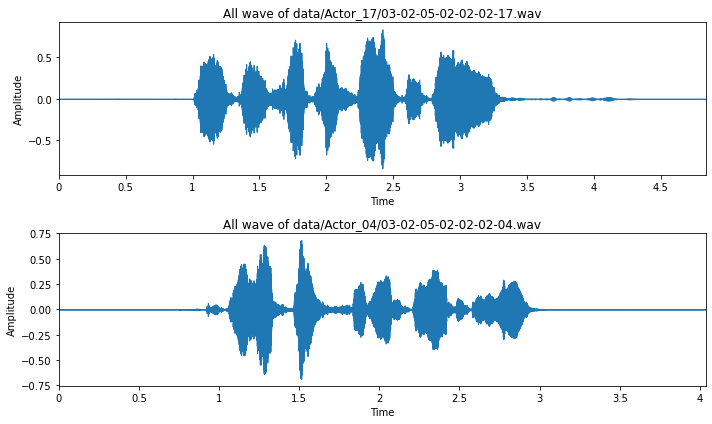

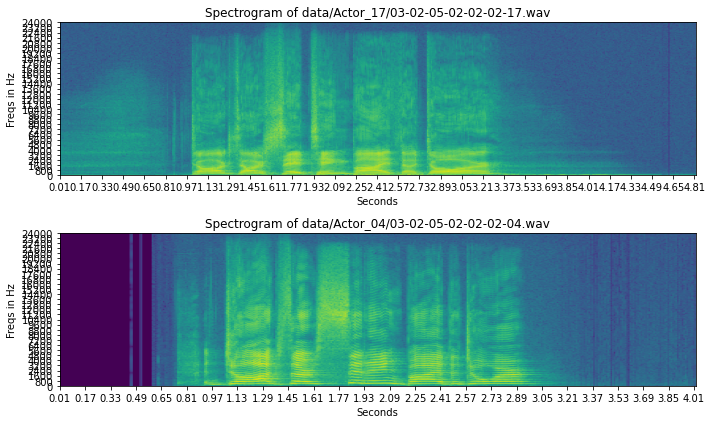

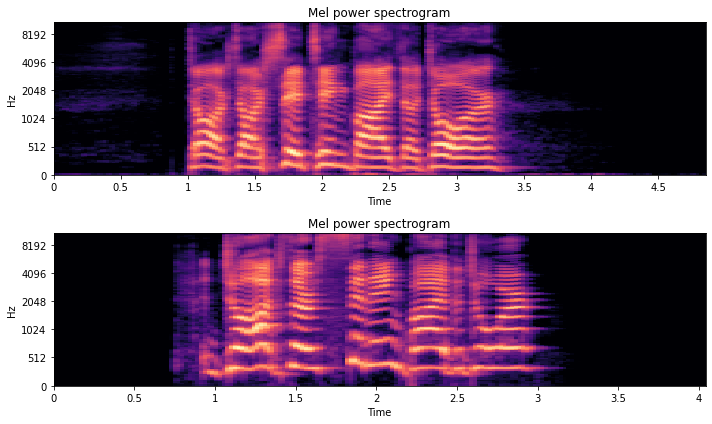

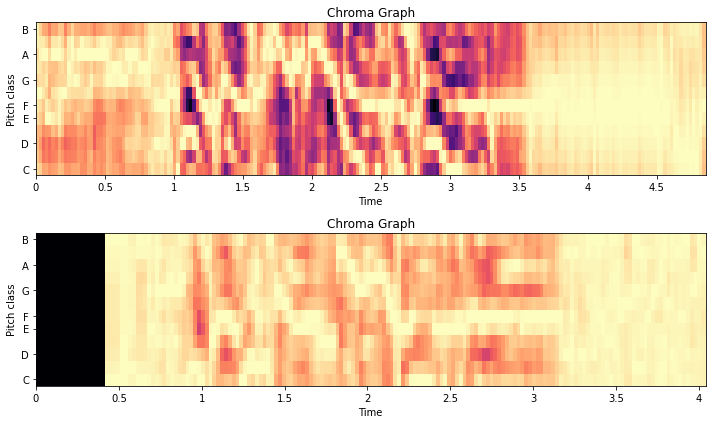

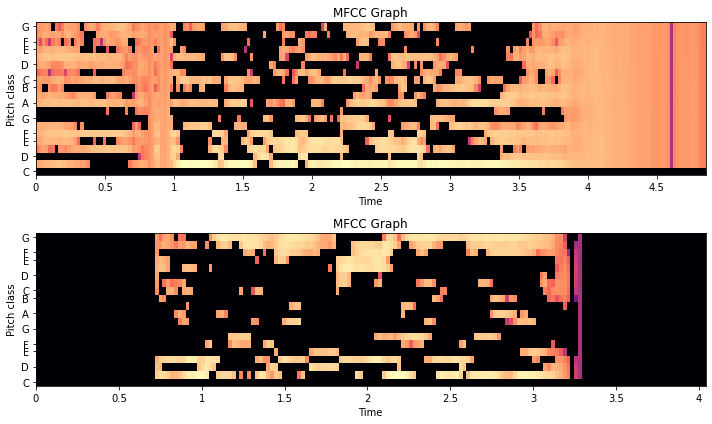

In [10]:
util.plot_compare([male_angry, female_angry])

### Data Preprocessing

---

Best thing in these graphs, you can see the gender difference from pitch graphs, data is coming from MFCC or Chroma.

So, I can use these features at my models. All 3 tranformations can be used one by one or together, I decide to use together. 

Also there are silent times on voices, I can trim them.



---

Below read file function reads the all files one by one and extracting features from audio file. 

Also extract information about audio from file. If I add these extra information to model, generalize the modele is not easy. Otherwise I skip the features model can be generilize for audio detection. 

On the other hand, gender seperation from data is really hard thing. I tried but the results were not as good as I wanted. So I decided to transform target with gender information. Now targets are male-happy, female-angry etc. 

In [11]:
# only emotions give 47% accuracy. 
# try with emotions + gender in target 

features = []
target = []

# saving encoder class to a file easy way. 
# more complex and best way is creating a class for holding encoder class. 
encoder_df = pd.DataFrame(columns=['full_path', 'encoder'])

for file in tqdm(data_files['full_path']):
    try:
#         la = LabelEncoder()
        
#         actor_num = data_files.query("full_path==@file")['actor_num'].iloc[0]
#         modelity = data_files.query("full_path==@file")['modelity'].iloc[0]
#         vocal_channel = data_files.query("full_path==@file")['vocal_channel'].iloc[0]    
#         emotional_intensity = data_files.query("full_path==@file")['emotional_intensity'].iloc[0]   
#         statement = data_files.query("full_path==@file")['statement'].iloc[0]   
#         repetition = data_files.query("full_path==@file")['repetition'].iloc[0]   
        actor_gender = data_files.query("full_path==@file")['actor_gender'].iloc[0] 
        
#         def_cols = np.array([actor_num, modelity, vocal_channel, emotional_intensity, statement, repetition, actor_gender])
#         def_cols = la.fit_transform(def_cols)
#         encoder_df = encoder_df.append(pd.DataFrame({'full_path':file, 'encoder':la}, index=[0]), ignore_index=True, sort=False )

        with soundfile.SoundFile(file) as f:
            X = f.read(dtype='float32')
            sample_rate = f.samplerate
            # X = util.trim_silent(X, db_threshold=10)
            # Short-time Fourier transform (STFT)
            stft = np.abs(librosa.stft(X))
            result = None
            # mean can be changed with min, max etc. 
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
            mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
            
#             result = np.hstack((def_cols, mfccs))
            result = mfccs
            result = np.hstack((result, chroma))
            result = np.hstack((result, mel))
            features.append(result)
        y = data_files.query("full_path==@file")['emotion'].iloc[0] + '_' + actor_gender
#         y = data_files.query("full_path==@file")['emotion'].iloc[0]        
        target.append(y)
    except Exception as e:
        print("Exception: {}".format(e))
        print("FileName: {}".format(file))
        pass
            
features = np.array(features)
target = np.array(target)
encoder_df['encoder'] = encoder_df['encoder'].astype(object)


 64%|██████▍   | 1575/2452 [01:11<00:33, 25.81it/s]

Exception: Invalid shape for monophonic audio: ndim=2, shape=(229029, 2)
FileName: data/Actor_24/03-02-01-01-01-01-24.wav


100%|██████████| 2452/2452 [01:46<00:00, 23.03it/s]


---

* Encode the target variable.
* Split data train and test, I used 25% for test. 
* Scale the features between 0 and 1. 

In [12]:
target_encoder = LabelEncoder()
encoded_target = target_encoder.fit_transform(target)

print("Target encoded.")

X_train, X_test, y_train, y_test = train_test_split(features, encoded_target, stratify=encoded_target, test_size=0.25, random_state=seed)

print("X_train shape: {}\nX_test shape: {}\ny_train shape: {}\ny_test shape:{}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Features Scaled. ")

Target encoded.
X_train shape: (1838, 180)
X_test shape: (1838,)
y_train shape: (613, 180)
y_test shape:(613,)
Features Scaled. 


---

* train and test set target graphs show they are closed to each other. There is some imbalances in the data. But first try models, If any problem in it I'll use other methods. 

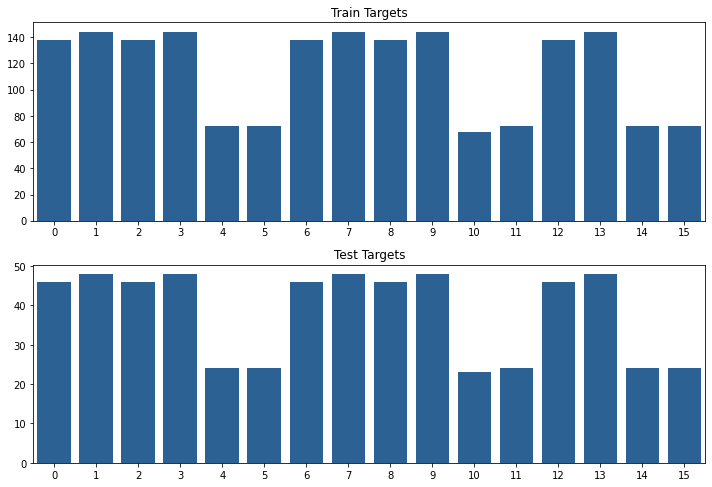

In [13]:
fig = plt.figure(figsize=(10, 10))

ax_train = fig.add_subplot(311)
train_vals = np.unique(y_train, return_counts=True)
sns.barplot(x=train_vals[0], y=train_vals[1], color='#1b62a5')
ax_train.set_title("Train Targets")

ax_test = fig.add_subplot(312)
test_vals = np.unique(y_test, return_counts=True)
sns.barplot(x=test_vals[0], y=test_vals[1], color='#1b62a5')
ax_test.set_title("Test Targets")

plt.tight_layout()
plt.show()

### Modeling


---

I create a base model with DecisionTreeClassifier. 

This gives me the base score with data, and I will try beat it. 

In [14]:
%%time

#bsae model DecisionTree

from sklearn.tree import DecisionTreeClassifier

n_classes = len(np.unique(encoded_target))

model = DecisionTreeClassifier(random_state=seed)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.43      0.50      0.46        46
           1       0.55      0.54      0.55        48
           2       0.59      0.63      0.61        46
           3       0.60      0.69      0.64        48
           4       0.32      0.29      0.30        24
           5       0.31      0.33      0.32        24
           6       0.44      0.30      0.36        46
           7       0.38      0.33      0.36        48
           8       0.41      0.46      0.43        46
           9       0.38      0.38      0.38        48
          10       0.48      0.43      0.45        23
          11       0.48      0.58      0.53        24
          12       0.50      0.48      0.49        46
          13       0.35      0.33      0.34        48
          14       0.43      0.50      0.46        24
          15       0.32      0.25      0.28        24

    accuracy                           0.45       613
   macro avg       0.43   

---

Now, I try with`RandomForestClassifier`, 

This model almost 50% better than DecisionTreeClassifier as expected. Because RandomForest creates so many tree and finds the best one. 


In [15]:
model = RandomForestClassifier(random_state=seed)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(metrics.classification_report(y_test, predictions))
print("Balanced Accuracy: {:.2f}".format(metrics.balanced_accuracy_score(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65        46
           1       0.76      0.77      0.76        48
           2       0.72      0.89      0.80        46
           3       0.58      0.92      0.71        48
           4       0.58      0.62      0.60        24
           5       0.56      0.58      0.57        24
           6       0.62      0.63      0.62        46
           7       0.50      0.35      0.41        48
           8       0.67      0.57      0.61        46
           9       0.53      0.48      0.51        48
          10       0.76      0.57      0.65        23
          11       0.93      0.58      0.72        24
          12       0.61      0.61      0.61        46
          13       0.75      0.56      0.64        48
          14       0.43      0.50      0.46        24
          15       0.65      0.71      0.68        24

    accuracy                           0.63       613
   macro avg       0.64   

---

Basic `MLP Classifier` is the best one till now. Let's look at the parameters. 

* Size of 300 is just intuitive. 

In [16]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(300, 300, 300), random_state=seed)

mlp_clf.fit(X_train, y_train)

mlp_preds = mlp_clf.predict(X_test)
print(metrics.classification_report(y_test, mlp_preds ))
print("Balanced Accuracy: {:.2f}".format(metrics.balanced_accuracy_score(y_test, mlp_preds)))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73        46
           1       0.79      0.85      0.82        48
           2       0.85      0.85      0.85        46
           3       0.85      0.85      0.85        48
           4       0.68      0.62      0.65        24
           5       0.57      0.54      0.55        24
           6       0.65      0.72      0.68        46
           7       0.72      0.75      0.73        48
           8       0.78      0.76      0.77        46
           9       0.72      0.71      0.72        48
          10       0.75      0.65      0.70        23
          11       0.88      0.88      0.88        24
          12       0.67      0.67      0.67        46
          13       0.84      0.77      0.80        48
          14       0.56      0.58      0.57        24
          15       0.61      0.71      0.65        24

    accuracy                           0.74       613
   macro avg       0.73   

<p></p>

### Parameter Tuning


---

Trees look good for model for now. I will try with LightGBM (GradientBoostingTree). This models like random forest, creates many trees, but calculates the split points weight for every iteration, and find the best split with this way.

I will do it with cross validation and parameter tuning. I will use for all three models, decision tree, random forest and lgb.
After that, I can use voting classifier with weights of all models. 

Randomized search is more efficient from Grid Search algorithm. [James Bergstra , Yoshua Bengio, Random Search for Hyper-Parameter Optimization, 2/12](http://jmlr.csail.mit.edu/papers/volume13/bergstra12a/bergstra12a.pdf)
    
I'm doing 10 kfold with 30 iteration of randomized parameters. These type of programatically parameter tuning gives you flexibility for searching possible solutions easily. Alternative of this method is to select model (like LGBM), and to tune parameters one by one. For instance LGBM has own steps for parameter tuning. I add a picture below for suggested tuning.
    
    
<img src="lgbm_tuning.jpeg" width="300" height="300" align="left"/>


In [17]:
clf_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

PARAM_GRID = {
    LGBMClassifier: {
        "clf__n_estimators": np.random.uniform(50, 500, 10).astype(int).tolist(),
        "clf__max_depth": np.random.uniform(5, 50, 10).astype(int).tolist(),
        "clf__num_leaves": np.random.uniform(31, 100, 10).astype(int).tolist(),
        "clf__learning_rate": np.random.uniform(0.001, 0.5, 10).tolist(),
        "clf__subsample": np.random.uniform(0.3, 0.9, 10).tolist(),
        "clf__reg_alpha": np.random.uniform(0.1, 10, 10).tolist(),
        "clf__reg_lambda": np.random.uniform(0.1, 10, 10).tolist(),
        "clf__colsample_bytree": np.random.uniform(0.3, 0.9, 10).tolist(),
        "clf__min_data_in_leaf": np.random.uniform(100, 1000, 10).astype(int).tolist(),
        "clf__verbose": [-1],
        "clf__silent":[True],
        "clf__random_state":[seed]
    },
    RandomForestClassifier: {
       # "clf__ccp_alpha": np.random.uniform(0, 1, 10).astype(float).tolist(),
        "clf__max_depth": np.random.uniform(1, 250, 10).astype(int).tolist(),
        "clf__n_estimators":np.random.uniform(50, 500, 10).astype(int).tolist(),
       # "clf__criterion": ['gini', 'entropy'],
        "clf__random_state":[seed]
    },
    BaggingClassifier: {
        "clf__max_features":np.random.uniform(0.3, 1, 10).astype(float).tolist(),
        "clf__random_state":[seed],
        "clf__n_estimators":np.random.uniform(10, 100, 10).astype(int).tolist()
    }, 
    MLPClassifier: {
        "clf__activation":['logistic', 'tanh', 'relu'],
        "clf__solver": ['lbfgs', 'sgd', 'adam'],
        "clf__learning_rate_init": np.random.uniform(0.001, 0.5, 10).tolist(),
        "clf__tol": np.random.uniform(0.001, 0.5, 10).tolist()
    }

}

MODELS = [LGBMClassifier, RandomForestClassifier, BaggingClassifier, MLPClassifier]

In [18]:
%%time

best_estimators = {}

for i, model in enumerate(MODELS):
    start_time = time.time()
    print("Task {} of {}".format(i+1, len(MODELS)))
    print("Working on: {}".format(model.__name__))
    pipeline = Pipeline([('clf', model())])
    model_grid = RandomizedSearchCV(pipeline
                                   , param_distributions=PARAM_GRID[model]
                                   , n_iter=30
                                   , scoring='balanced_accuracy'
                                   , cv=clf_cv
                                   , random_state=seed
                                   , verbose=0
                                   , n_jobs=10
                                   )
    model_grid.fit(X_train, y_train)
    best_estimators[model.__name__] = model_grid.best_estimator_
    
    print("\tElapsed time is {} .".format(datetime.timedelta(seconds=time.time() - start_time)))
    


Task 1 of 4
Working on: LGBMClassifier
	Elapsed time is 0:01:13.736012 .
Task 2 of 4
Working on: RandomForestClassifier
	Elapsed time is 0:04:06.849592 .
Task 3 of 4
Working on: BaggingClassifier
	Elapsed time is 0:04:08.363307 .
Task 4 of 4
Working on: MLPClassifier
	Elapsed time is 0:00:16.777957 .
CPU times: user 29.4 s, sys: 1.1 s, total: 30.5 s
Wall time: 9min 45s


---

Prediction scores on test set show there is not much improvement with tuning models. 

Last thing in here I try with a basic CNN model. If the model shows close to these scores, I'll try augmentation like images. 

In [19]:
prediction_scores = {}
for k, v in best_estimators.items():
    prediction_scores[k] = np.round(metrics.balanced_accuracy_score(y_test, v['clf'].predict(X_test)), decimals=4)

name_len = max([len(x) for x in best_estimators.keys()]) +1
print('| '.join(str(t).ljust(name_len) for t in ['Model Name', 'Accuracy']))
for i, items in enumerate(prediction_scores.items()):
    line = '| '.join(str(x).ljust(name_len) for x in items)
    if i == 0:
        print('-'*len(line))
    print(line)

Model Name             | Accuracy               
------------------------------------------------
LGBMClassifier         | 0.5605                 
RandomForestClassifier | 0.6354                 
BaggingClassifier      | 0.6287                 
MLPClassifier          | 0.6699                 


#### CNN Model

---

In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of deep neural networks, most commonly applied to analyzing visual imagery. They are also known as shift invariant or space invariant artificial neural networks (SIANN), based on their shared-weights architecture and translation invariance characteristics. They have applications in image and video recognition, recommender systems, image classification, medical image analysis, natural language processing, and financial time series. [[6]](https://en.wikipedia.org/wiki/Convolutional_neural_network)

* A Typical CNN architecture. 

![cnn arch.](https://upload.wikimedia.org/wikipedia/commons/6/63/Typical_cnn.png)

![](https://miro.medium.com/max/1000/0*aWIO7eB6E4-cIkK9.gif)

* Basically CNN scan the matrix with given kernel size and extract the features to next layer. 
* I use keras with tensorflow backend, and use a simple architecture. If first model will be successful, I can try more deep and complex models. Otherwise I will try data augmentation or SMOTE for imbalancing. 
* First I need is reshape the array for CNN model. I use 1d CNN so data will be reshaped to [-1, rows, columns, 1], the data matrix has 180 columns. So I can reshape it to [-1, 18, 10, 1]. My target variable is 1 dimension vector, to create a neural network with categorical_crossentropy loss I need encode with one hot. 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 18, 10, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 5, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 9, 5, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 5, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 3, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 3, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 3, 64)          1

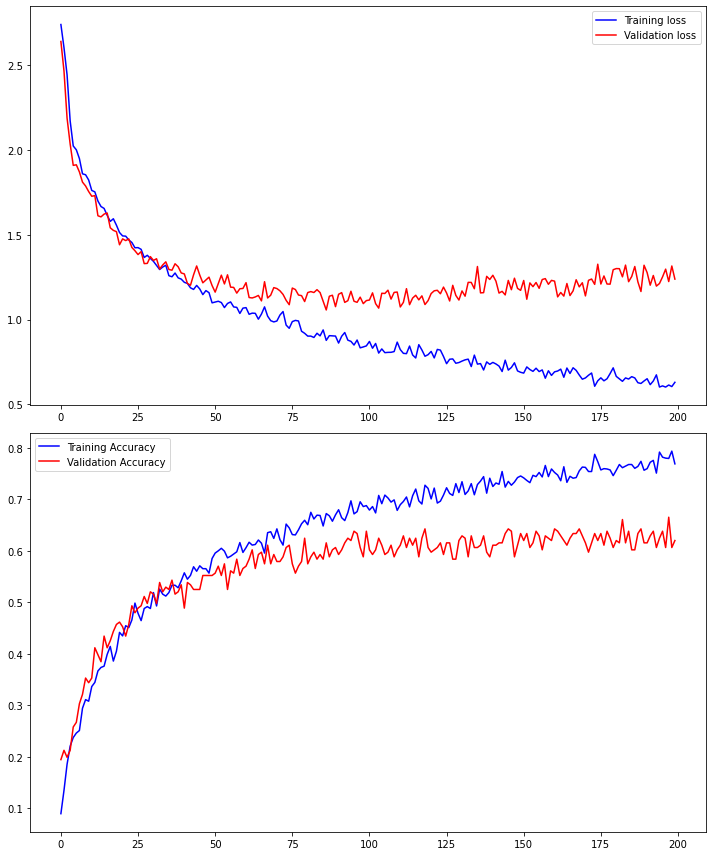

In [20]:
new_shape = [-1, 18, 10, 1]

cnn_x_train = np.reshape(X_train, new_shape)
cnn_x_test = np.reshape(X_test, new_shape)

cnn_y_train = tf.one_hot(y_train, depth=n_classes)
cnn_y_test = tf.one_hot(y_test, depth=n_classes)

model = modeling.create_cnn_model(input_shape=cnn_x_train.shape[-3:], n_classes=n_classes)
print(model.summary())

#train the model. 
info_callback = modeling.KerasValInfo(n_verbose_step=25)

history = model.fit(cnn_x_train, cnn_y_train
                   , batch_size=32
                   , epochs=200
                   , verbose=0
                   , shuffle=True
                   , validation_split=0.12
                   , callbacks=[info_callback])

print('\n')
util.plot_train_history(history, '')



In [21]:
cnn_preds = np.argmax(model.predict(cnn_x_test), axis=1)

print(metrics.classification_report(y_test, cnn_preds ))
print("Balanced Accuracy: {:.2f}".format(metrics.balanced_accuracy_score(y_test, cnn_preds)))


              precision    recall  f1-score   support

           0       0.74      0.63      0.68        46
           1       0.71      0.71      0.71        48
           2       0.66      0.85      0.74        46
           3       0.61      0.88      0.72        48
           4       0.40      0.33      0.36        24
           5       0.60      0.62      0.61        24
           6       0.56      0.59      0.57        46
           7       0.50      0.48      0.49        48
           8       0.69      0.59      0.64        46
           9       0.61      0.42      0.49        48
          10       0.78      0.61      0.68        23
          11       0.89      0.67      0.76        24
          12       0.66      0.63      0.64        46
          13       0.53      0.35      0.42        48
          14       0.35      0.62      0.45        24
          15       0.50      0.67      0.57        24

    accuracy                           0.61       613
   macro avg       0.61   

---

* According to basic CNN model, this is promising more accurate results. So I will try same architecture on augmented data. 
* I used 4 different transformation for augmentation. Beside of all transformation I trim the voices for silent parts.  
    1- White Noise  
    2- Add harmonic effect.   
    3- Shift down the pitch by a tritone.   
    4- Shift up the pitch by 3 quarter-tones.   
    
* After augmentation I have 9195 different voice files. let's do it again with cnn model. 

In [22]:
features = []
target = []

for file in tqdm(data_files['full_path']):
    actor_gender = data_files.query("full_path==@file")['actor_gender'].iloc[0]
#     y = data_files.query("full_path==@file")['emotion'].iloc[0]
    y = data_files.query("full_path==@file")['emotion'].iloc[0] + '_' + actor_gender
    sr = 16000
    files = util.data_augmentation(file ,sr=sr, return_original=True)
    result = None

    for f in files:
        f = util.trim_silent(f, db_threshold=10)
        stft = np.abs(librosa.stft(f))
        mfccs = np.mean(librosa.feature.mfcc(y=f, sr=sr, n_mfcc=40).T, axis=0)
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T, axis=0)
        mel = np.mean(librosa.feature.melspectrogram(y=f, sr=sr).T, axis=0)

        result = np.hstack((mfccs, chroma))
        result = np.hstack((result, mel))
        target.append(y) 

        features.append(result)

features, target = np.array(features), np.array(target) 

 54%|█████▍    | 1319/2452 [10:19<07:46,  2.43it/s]/Users/tuncayk/genel/miniconda3/envs/env_speech/lib/python3.7/site-packages/librosa/core/pitch.py:146: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')
100%|██████████| 2452/2452 [20:19<00:00,  2.01it/s]


In [23]:
target_encoder = LabelEncoder()
encoded_target = target_encoder.fit_transform(target)

print("Target encoded.")

X_train, X_test, y_train, y_test = train_test_split(features, encoded_target, stratify=encoded_target, test_size=0.25, random_state=seed)

print("X_train shape: {}\nX_test shape: {}\ny_train shape: {}\ny_test shape:{}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Features Scaled. ")

Target encoded.
X_train shape: (9195, 180)
X_test shape: (9195,)
y_train shape: (3065, 180)
y_test shape:(3065,)
Features Scaled. 


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 18, 10, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 9, 5, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 9, 5, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 5, 32)          9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 3, 32)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 3, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 3, 64)         

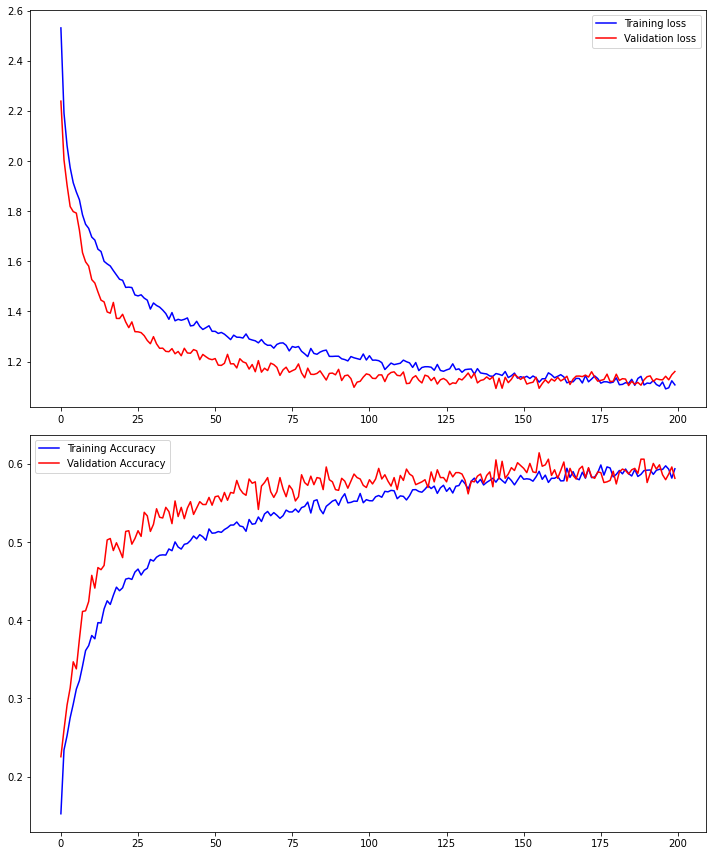

In [24]:
new_shape = [-1, 18, 10, 1]

cnn_x_train = np.reshape(X_train, new_shape)
cnn_x_test = np.reshape(X_test, new_shape)

cnn_y_train = tf.one_hot(y_train, depth=n_classes)
cnn_y_test = tf.one_hot(y_test, depth=n_classes)

model = modeling.create_cnn_model(input_shape=cnn_x_train.shape[-3:], n_classes=n_classes)
print(model.summary())

#train the model. 
info_callback = modeling.KerasValInfo(n_verbose_step=25)

history = model.fit(cnn_x_train, cnn_y_train
                   , batch_size=32
                   , epochs=200
                   , verbose=0
                   , shuffle=True
                   , validation_split=0.12
                   , callbacks=[info_callback])

print('\n')
util.plot_train_history(history, '')




---

Model is not looking bad. This model can be generalize actually. But I want to try with boosting again, let's look at the results. 

In [25]:
%%time

best_estimators = {}

for i, model in enumerate(MODELS):
    start_time = time.time()
    print("Task {} of {}".format(i+1, len(MODELS)))
    print("Working on: {}".format(model.__name__))
    pipeline = Pipeline([('clf', model())])
    model_grid_2 = RandomizedSearchCV(pipeline
                                   , param_distributions=PARAM_GRID[model]
                                   , n_iter=30
                                   , scoring='balanced_accuracy'
                                   , cv=clf_cv
                                   , random_state=seed
                                   , verbose=0
                                   , n_jobs=10
                                   )
    model_grid_2.fit(X_train, y_train)
    best_estimators[model.__name__] = model_grid_2.best_estimator_
    
    print("\tElapsed time is {} .".format(datetime.timedelta(seconds=time.time() - start_time)))

Task 1 of 4
Working on: LGBMClassifier
	Elapsed time is 0:13:12.285743 .
Task 2 of 4
Working on: RandomForestClassifier
	Elapsed time is 0:26:47.821173 .
Task 3 of 4
Working on: BaggingClassifier
	Elapsed time is 0:29:35.432698 .
Task 4 of 4
Working on: MLPClassifier
	Elapsed time is 0:01:12.190271 .
CPU times: user 2min 33s, sys: 2.51 s, total: 2min 35s
Wall time: 1h 10min 47s


In [26]:
prediction_scores = {}
for k, v in best_estimators.items():
    prediction_scores[k] = np.round(metrics.balanced_accuracy_score(y_test, v['clf'].predict(X_test)), decimals=4)

name_len = max([len(x) for x in best_estimators.keys()]) +1
print('| '.join(str(t).ljust(name_len) for t in ['Model Name', 'Accuracy']))
for i, items in enumerate(prediction_scores.items()):
    line = '| '.join(str(x).ljust(name_len) for x in items)
    if i == 0:
        print('-'*len(line))
    print(line)

Model Name             | Accuracy               
------------------------------------------------
LGBMClassifier         | 0.6717                 
RandomForestClassifier | 0.6636                 
BaggingClassifier      | 0.6387                 
MLPClassifier          | 0.6484                 


* MLP Results:

In [27]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(300, 300, 300), random_state=seed)

mlp_clf.fit(X_train, y_train)

mlp_preds = mlp_clf.predict(X_test)
print(metrics.classification_report(y_test, mlp_preds ))
print("Balanced Accuracy: {:.2f}".format(metrics.balanced_accuracy_score(y_test, mlp_preds)))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       230
           1       0.88      0.81      0.84       240
           2       0.79      0.87      0.83       230
           3       0.86      0.78      0.82       240
           4       0.72      0.64      0.68       120
           5       0.59      0.79      0.68       120
           6       0.81      0.67      0.73       230
           7       0.63      0.80      0.71       240
           8       0.79      0.75      0.77       230
           9       0.81      0.70      0.75       240
          10       0.77      0.74      0.75       115
          11       0.72      0.78      0.75       120
          12       0.74      0.78      0.76       230
          13       0.76      0.66      0.71       240
          14       0.65      0.86      0.74       120
          15       0.75      0.76      0.76       120

    accuracy                           0.76      3065
   macro avg       0.76   

---

#### Ensemble
---

For now, I have 0.76 accuracy for MLP Model with 300 x 3 hidden layers. Now I will use voting classifier with LGBM, MLP Classifier and Random Forest. There are 3 best classifier I've got. 

---

After voting classifier I got 0.73 accuracy. I started with 0.43 accuracy and at the end I reached 0.74. This ensemble model is best model for now. I can save it for using later. 



In [28]:
estimators = [('LGBM', best_estimators['LGBMClassifier'])
              ,('RandomForest', best_estimators['RandomForestClassifier'])
              ,('MLP', mlp_clf)]

_voting_classifier = VotingClassifier(estimators=estimators, n_jobs=10)

_voting_classifier.fit(X_train, y_train)

voting_preds = _voting_classifier.predict(X_test)
print(metrics.classification_report(y_test, voting_preds ))
print("Balanced Accuracy: {:.2f}".format(metrics.balanced_accuracy_score(y_test, voting_preds)))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77       230
           1       0.88      0.85      0.86       240
           2       0.69      0.89      0.78       230
           3       0.69      0.88      0.77       240
           4       0.57      0.62      0.59       120
           5       0.70      0.68      0.69       120
           6       0.68      0.73      0.70       230
           7       0.71      0.67      0.69       240
           8       0.81      0.70      0.75       230
           9       0.74      0.75      0.74       240
          10       0.91      0.68      0.78       115
          11       0.83      0.62      0.71       120
          12       0.70      0.70      0.70       230
          13       0.76      0.72      0.74       240
          14       0.80      0.77      0.78       120
          15       0.83      0.63      0.72       120

    accuracy                           0.74      3065
   macro avg       0.75   

In [37]:
with open('voting_clf_model.pickle', 'wb') as f:
    pickle.dump(_voting_classifier, f)
    
print("Voting Classifier saved to file `voting_clf_model.pickle`.")    

Voting Classifier saved to file `voting_clf_model.pickle`.
